<a href="https://colab.research.google.com/github/pix2712/10-Fruit/blob/main/10_Fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np
import os


In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
train = ImageDataGenerator(rescale = 1./255)
validation = ImageDataGenerator(rescale=1/255)

In [23]:
train_dataset = train.flow_from_directory('/content/gdrive/MyDrive/Exam/10 Fruits/Train',target_size=(150,150),batch_size=3,class_mode='categorical')
validation_dataset = train.flow_from_directory('/content/gdrive/MyDrive/Exam/10 Fruits/Validation',target_size=(150,150),batch_size=3,class_mode='categorical')

Found 212 images belonging to 10 classes.
Found 54 images belonging to 10 classes.


In [24]:
train_dataset.class_indices

{'Bưởi': 0,
 'Chôm chôm': 1,
 'Chuối': 2,
 'Dâu tây': 3,
 'Dưa hấu': 4,
 'Khế': 5,
 'Nho': 6,
 'Quýt': 7,
 'Sầu riêng': 8,
 'Táo': 9}

In [36]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))



model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_dataset,epochs=50,batch_size=128,validation_data=validation_dataset,verbose=1)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 18, 18, 64)      

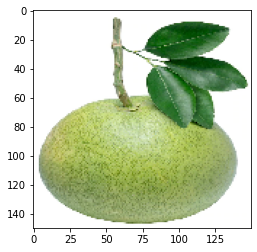

Bưởi


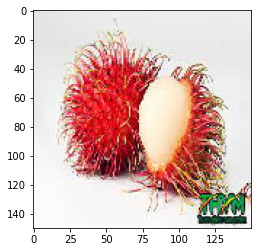

Chôm chôm


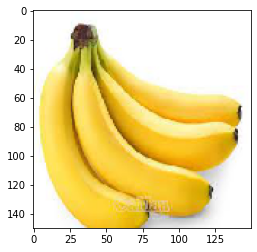

chuối


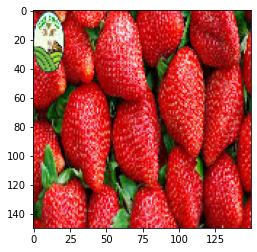

Dâu tây 


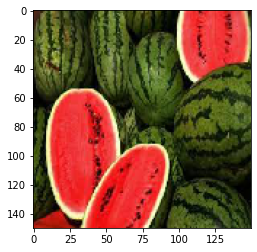

Dưa hấu 


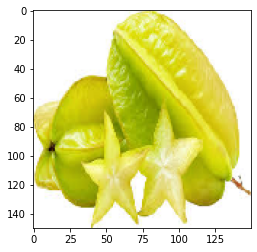

Khế 


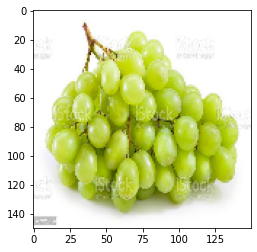

Nho 


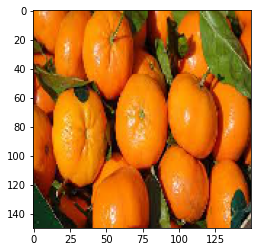

Quýt 


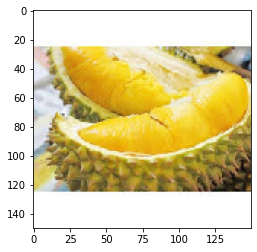

Sầu riêng 


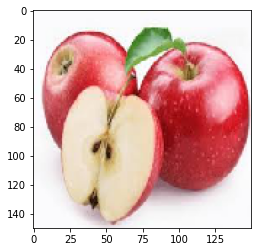

Táo 


(1, 150, 150, 3)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

path = '//content/gdrive/MyDrive/Exam/10 Fruits/Test'
for i in range (10):
    img = load_img(path+'//'+str(i+1)+'.jpg',target_size=(150,150))
    plt.imshow(img)
    plt.show()

    img = img_to_array(img)
    img=np.reshape(img,(1,150,150,3))
    img = img.astype('float32')
    img = img/255
    predict =  np.argmax(model.predict(img))
    if predict==0:
      print("Bưởi")
    elif predict==1: 
      print("Chôm chôm")
    elif predict==2: 
      print("chuối")
    elif predict==3: 
      print("Dâu tây ")
    elif predict==4: 
      print("Dưa hấu ")
    elif predict==5: 
      print("Khế ")
    elif predict==6: 
      print("Nho ")
    elif predict==7: 
      print("Quýt ")
    elif predict==8: 
      print("Sầu riêng ")
    elif predict==9: 
      print("Táo ")

img.shape

In [27]:
train_dataset.class_indices

{'Bưởi': 0,
 'Chôm chôm': 1,
 'Chuối': 2,
 'Dâu tây': 3,
 'Dưa hấu': 4,
 'Khế': 5,
 'Nho': 6,
 'Quýt': 7,
 'Sầu riêng': 8,
 'Táo': 9}

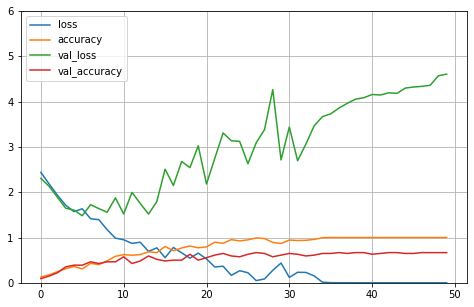

In [38]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,6)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


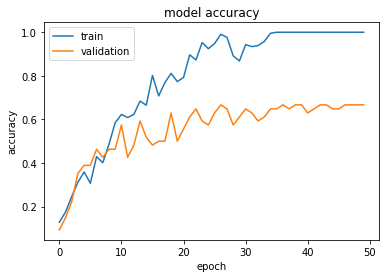

In [42]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upperleft')
plt.show()